## GENERATE GRAPH FROM FILE


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def motifs_occurence_count(motif_occurrences):
    """
    Count the UNIQUE number of moifs removing all the permutations

    Parameters:
    - motif_occurences: The motif found in the graph.

    Returns:
    - Exact number of motifs.
    """
    unique_motifs = set()

    for occurrence in motif_occurrences:
        # Convert the occurrence to a sorted tuple of nodes
        sorted_occurrence = tuple(sorted(occurrence))
        unique_motifs.add(sorted_occurrence)

    return len(unique_motifs) , unique_motifs


This function reads the specified .tntp file and extracts relevant information
    to initialize a NetworkX graph. It then adds nodes and edges to the graph based
    on the data in the file.

In [3]:
def find_motifs_directed_graph(graph, motif):
    """
    Find all occurrences of a motif in a directed graph.

    Parameters:
    - graph: The input graph.
    - motif: The motif graph to search for.

    Returns:
    - List of dictionaries representing node mappings for each occurrence.
    """
    motif_occurrences = []

    # Using DiGraphMatcher to check for isomorphism in directed graphs
    matcher = nx.algorithms.isomorphism.DiGraphMatcher(graph, motif)

    for subgraph_nodes in matcher.subgraph_monomorphisms_iter():
        motif_occurrences.append(subgraph_nodes)

    return motif_occurrences


In [4]:
def find_motifs_undirected_graph(graph, motif, motif_size):
  """
    Find all occurrences of a motif in a undirected graph.

    Parameters:
    - graph: The input graph.
    - motif: The motif graph to search for.
    - motif_size : Size of subgraph

    Returns:
    - List of dictionaries representing node mappings for each occurrence.
    """
  #create the list of all graphlets
  motif_occurrences = []
  # Using the subgraph isomorphism function for undirected graphs
  for subgraph_nodes in nx.enumerate_all_cliques(graph):
      if len(subgraph_nodes) == motif_size:
          # Check if the subgraph is isomorphic to the motif
          subgraph = graph.subgraph(subgraph_nodes)
          if nx.is_isomorphic(subgraph, motif):
              motif_occurrences.append(dict(zip(subgraph_nodes, range(motif_size))))

  return motif_occurrences

In [5]:
def read_tntp_to_directed_graph(file_path):
    """
        Read tntp file and generate a directed graph

        Parameters:
        - file_path : Position of the file

        Returns:
        - Graph G

    """
    # Read TNTP file into a Pandas DataFrame
    df = pd.read_csv(file_path, skiprows=8, delimiter='\t', comment=';')

    # Convert weights to float
    df['length'] = df['length'].astype(float)
    #rename the column length to weight
    df = df.rename(columns={'length': 'weight'})

    # Create a graph from the DataFrame
    G = nx.from_pandas_edgelist(df, 'init_node', 'term_node', ['weight'], create_using=nx.DiGraph())

    return G

def read_tntp_to_undirected_graph(file_path):
    """
        Read tntp file and generate a undirected graph

        Parameters:
        - file_path : Position of the file

        Returns:
        - Graph G

    """
   # Read TNTP file into a Pandas DataFrame
    df = pd.read_csv(file_path, skiprows=8, delimiter='\t', comment=';')

    # Convert weights to float
    df['length'] = df['length'].astype(float)
    #rename the column length to weight
    df = df.rename(columns={'length': 'weight'})

    # Create a graph from the DataFrame
    G = nx.from_pandas_edgelist(df, 'init_node', 'term_node', ['weight'], create_using=nx.Graph())

    return G

In [6]:
def miles_to_km(miles):
    # Conversion factor: 1 mile = 1.60934 kilometers
    return miles * 1.60934

def read_tntp_to_directed_graph_milesToKm(file_path):
    """
        Read tntp file and generate a directed graph

        Parameters:
        - file_path : Position of the file

        Returns:
        - Graph G

    """
    # Read TNTP file into a Pandas DataFrame
    df = pd.read_csv(file_path, skiprows=8, delimiter='\t', comment=';')

    # Convert weights to float
    df['length'] = df['length'].astype(float)
    df['lenght'] = df['length'].apply(miles_to_km)
    #rename the column length to weight
    df = df.rename(columns={'length': 'weight'})

    # Create a graph from the DataFrame
    G = nx.from_pandas_edgelist(df, 'init_node', 'term_node', ['weight'], create_using=nx.DiGraph())

    return G

def read_tntp_to_undirected_graph_milesToKm(file_path):
    """
        Read tntp file and generate a undirected graph

        Parameters:
        - file_path : Position of the file

        Returns:
        - Graph G

    """
   # Read TNTP file into a Pandas DataFrame
    df = pd.read_csv(file_path, skiprows=8, delimiter='\t', comment=';')

    # Convert weights to float
    df['length'] = df['length'].astype(float)
    df['lenght'] = df['length'].apply(miles_to_km)

    #rename the column length to weight
    df = df.rename(columns={'length': 'weight'})

    # Create a graph from the DataFrame
    G = nx.from_pandas_edgelist(df, 'init_node', 'term_node', ['weight'], create_using=nx.Graph())

    return G

In [7]:
def plot_data(data, title):
    """
        Plot a graph where on the x-axis there are the nodes and on the y-axis are present the value
        of the measure computed relative to the node

        Parameters:
        - data : a dict/map with key=nodes, value=value of the measurement
        - title: the title of the plot, (e.g. the measurement's name)
    """
    # orders the data to have an ascending sort of the keys into the 'data'
    data = dict(sorted(data.items()))
    # extract the keys
    keys = list(data.keys())
    # extract the values
    values = list(data.values())
    #calculate the maximum of the closeness centrality
    max_key = max(data, key=lambda k: data[k])
    max_value = data[max_key]

    # plot settings
    plt.figure(figsize=(15, 9))
    plt.plot(keys, values, marker='o', linestyle='-', color='b', linewidth=1)
    plt.title(title, fontweight='bold', fontsize=20)
    plt.scatter(max_key, max_value, color='red', marker='o', s=200, label='Max value')
    plt.axvline(x=max_key, linestyle='--', color='gray', linewidth=2)
    plt.axhline(y=max_value, linestyle='--', color='gray', linewidth=2)
    plt.xlabel('Nodes', fontsize=13)
    plt.ylabel('Values', fontsize=13)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_hist(data1, data2):
    """
        Plot a bar-graph where it's possible to compare two measurements.

        Parameters:
        - data1, data2: the 2 values of the measurements.
    """
    plt.figure(figsize=(15, 9))
    plt.bar(['Berlin', 'Philadelphia'], [data1, data2], color=["red", "blue"], alpha=0.7, width=0.4)
    plt.axhline(max([data1, data2]), color='black', linestyle='dashed', linewidth=1)
    plt.xlabel("City", fontsize=14)
    plt.ylabel("Motif occurrences")
    plt.title("Motif occurrences comparison", fontweight='bold', fontsize=20)
    plt.show()

    
def plot_graph(graph):
    """
        plot a customized figure of both undirected and directed graph given in input

        Parameters:
        - graph: both undirected and directed graph
    """
    if graph.is_directed(): 
        # calculates the node positions for the graph layout
        pos = nx.spring_layout(graph)  
        # set the preferences for the plot
        nx.draw(graph, pos, with_labels=True, arrows=graph.is_directed(), node_size=700, node_color="skyblue", font_size=15, font_color="black", font_weight="bold", edge_color="black", linewidths=2, arrowstyle="->", connectionstyle="arc3,rad=0.1")
        # Display the graph
        plt.show()
    else: nx.draw(graph, with_labels=True)

### ANALYSIS SYDNEY DATASET

In the next cells we read and explore the network graphs exploiting the number of nodes and edges

In [8]:
network_file = 'Philadelphia_net.tntp'

#generate the directed graph for Philadelphia
G_phil_dir = read_tntp_to_directed_graph_milesToKm(network_file)

#generate all the connection inside the graph
G_phil_und = read_tntp_to_undirected_graph_milesToKm(network_file)

print("Directed graph for Philadelphia : " , G_phil_dir)
print("Undirected graph for Philadelphia : " , G_phil_und)

Directed graph for Philadelphia :  DiGraph with 13389 nodes and 40003 edges
Undirected graph for Philadelphia :  Graph with 13389 nodes and 21246 edges


In [9]:
network_file = 'berlin-center_net.tntp'

#generate the directed graph for Berlin
G_berlin_dir = read_tntp_to_directed_graph(network_file)

#generate all the connection inside the graph
G_berlin_und = read_tntp_to_undirected_graph(network_file)

#reading the position of nodes
#pos = read_tntp_file_node_pos(node_file)

print("Directed graph for Philadelphia   : " , G_berlin_dir)
print("Undirected graph for Philadelphia :   " , G_berlin_und)

Directed graph for Philadelphia   :  DiGraph with 12981 nodes and 28370 edges
Undirected graph for Philadelphia :    Graph with 12981 nodes and 21470 edges


# **Closeness Centrality**


Closeness centrality measures how quickly a node can reach all other nodes in the graph. It is based on the inverse of the sum of the shortest path distances from a node to all other nodes in the graph. Nodes with high closeness centrality are able to reach other nodes more efficiently.


*   High Closeness Centrality: A node with high closeness centrality is well-connected and, on average, has short distances to other nodes in the network. It can quickly influence or be influenced by other nodes in the graph.

*   Low Closeness Centrality: A node with low closeness centrality may be more isolated and take longer to reach other nodes. In this case, the node with the lowest value of the centrality represents the most isolated crossroads according to the road network.
---
Since we are studying a road network, the **intersection** with the highest closeness centrality is the one that, on average, is closest to all other intersections. This means that, from this intersection, a vehicle can reach any other intersection in the network with the least travel distance. This node serves as an efficient travel hub. It is well-located to quickly access different parts of the road network.
This crossroad is strategically positioned for minimizing travel times and facilitating convenient access to various destinations.

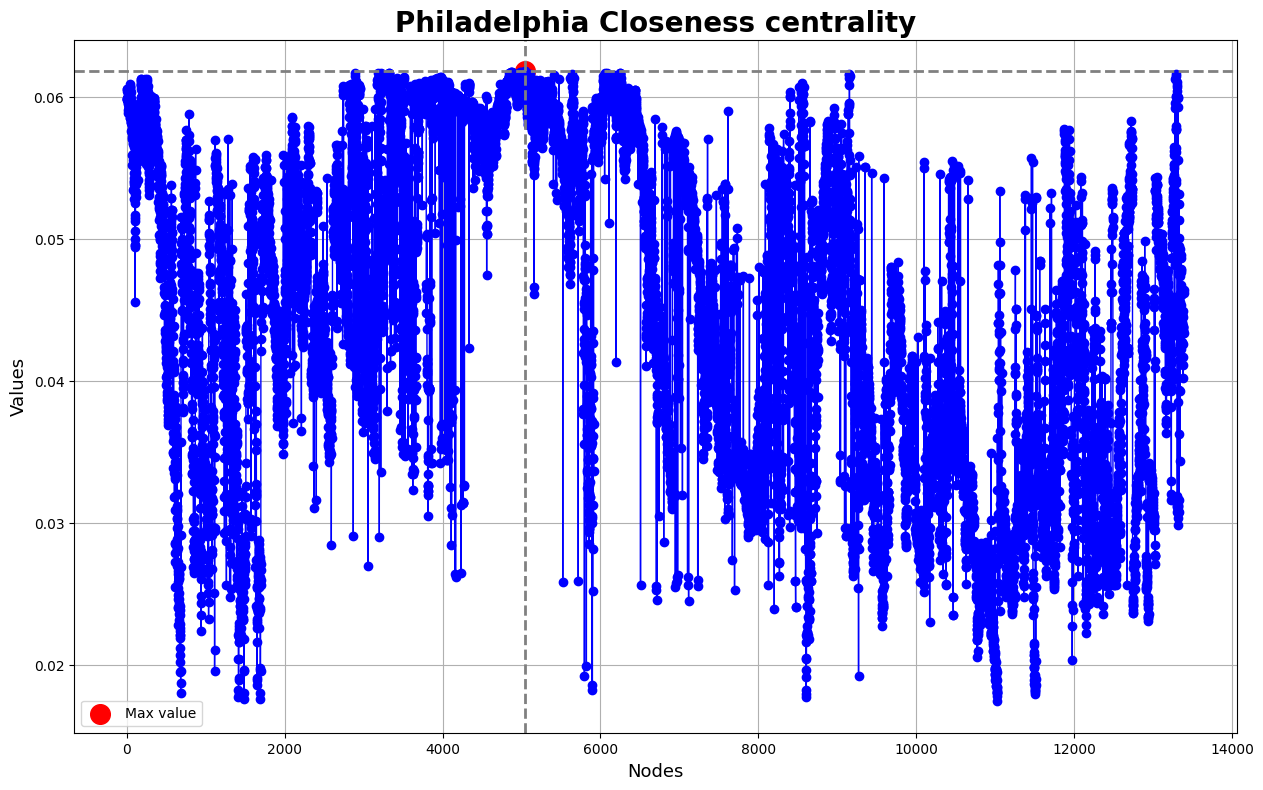

In [10]:
# Calculate Closeness Centrality for Philadelphia
closeness_centrality = nx.closeness_centrality(G_phil_dir, distance = 'weight')
plot_data(closeness_centrality, "Philadelphia Closeness centrality")

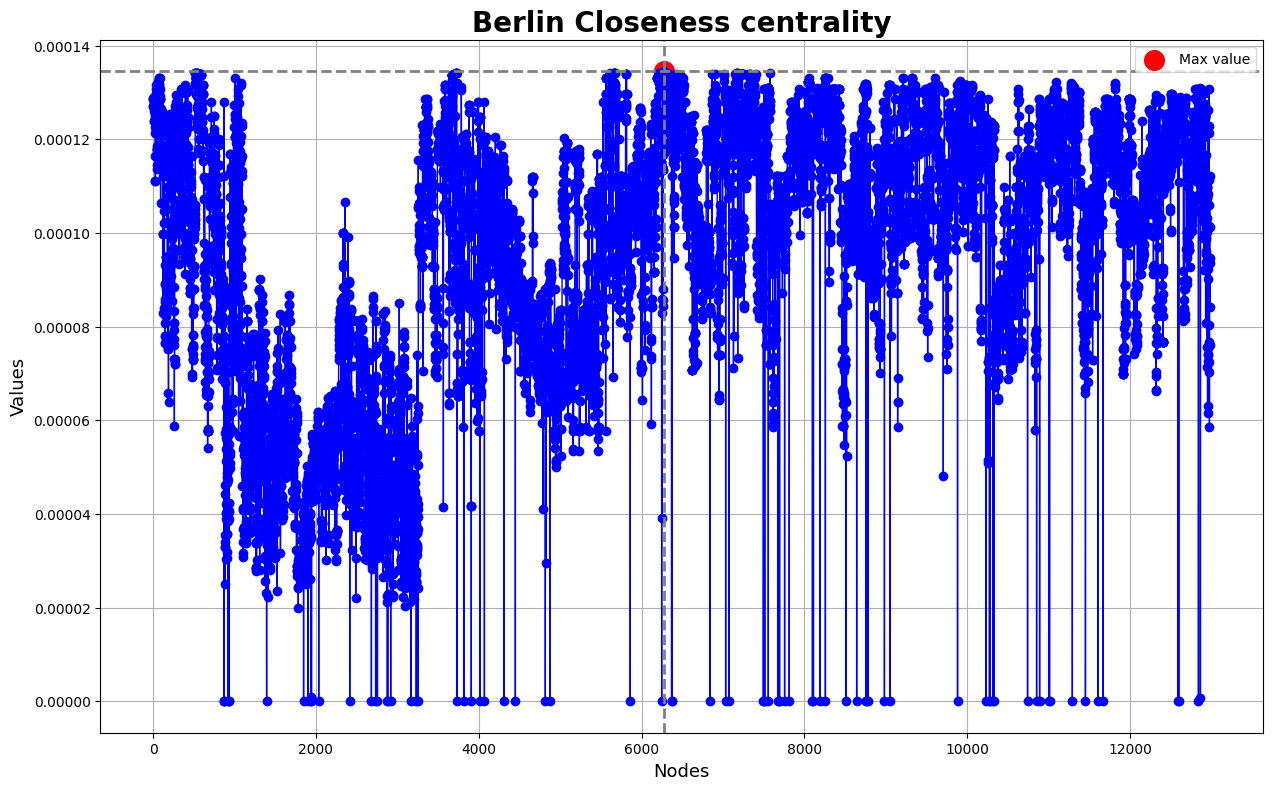

In [11]:
# Calculate Closeness Centrality for Berlin
closeness_centrality = nx.closeness_centrality(G_berlin_dir, distance = 'weight')
plot_data(closeness_centrality, "Berlin Closeness centrality")

# **Betweenness Centrality**
Betweenness centrality quantifies the extent to which a node lies on the shortest paths between other nodes in the graph. It measures how often a node acts as a bridge along the shortest paths between pairs of nodes. Nodes with high betweenness centrality act as key connectors or intermediaries in the network.

*   **High** Betweenness Centrality: A node with high betweenness centrality is crucial for maintaining the connectivity of the network. It often serves as a bridge between different parts of the graph. Indeed, the highest rated node represents the most centered node
*   **Low** Betweenness Centrality: Nodes with lower betweenness centrality are less critical in terms of being on the shortest paths between other nodes.
---
In our case study the **intersection** with the highest betweenness centrality is crucial for maintaining the overall connectivity of the road network. It acts as a key bridge or bottleneck in facilitating traffic flow between different intersections; it is likely to be a major connector between different routes and regions in the network.

Disruption or congestion at this intersection could have a significant impact on the connectivity of the entire road network. It is a key point for monitoring and managing traffic.


Identifying intersections with high closeness centrality is useful for planning infrastructure improvements to enhance overall accessibility. Focusing on intersections with high betweenness centrality helps in devising effective traffic management strategies to ensure smooth connectivity.
Understanding centrality can be crucial for emergency response planning, as highly central intersections might be prioritized for quick access.


Analyzing both metrics together provides a comprehensive view of the network's structure and potential points of interest for various planning and management purposes

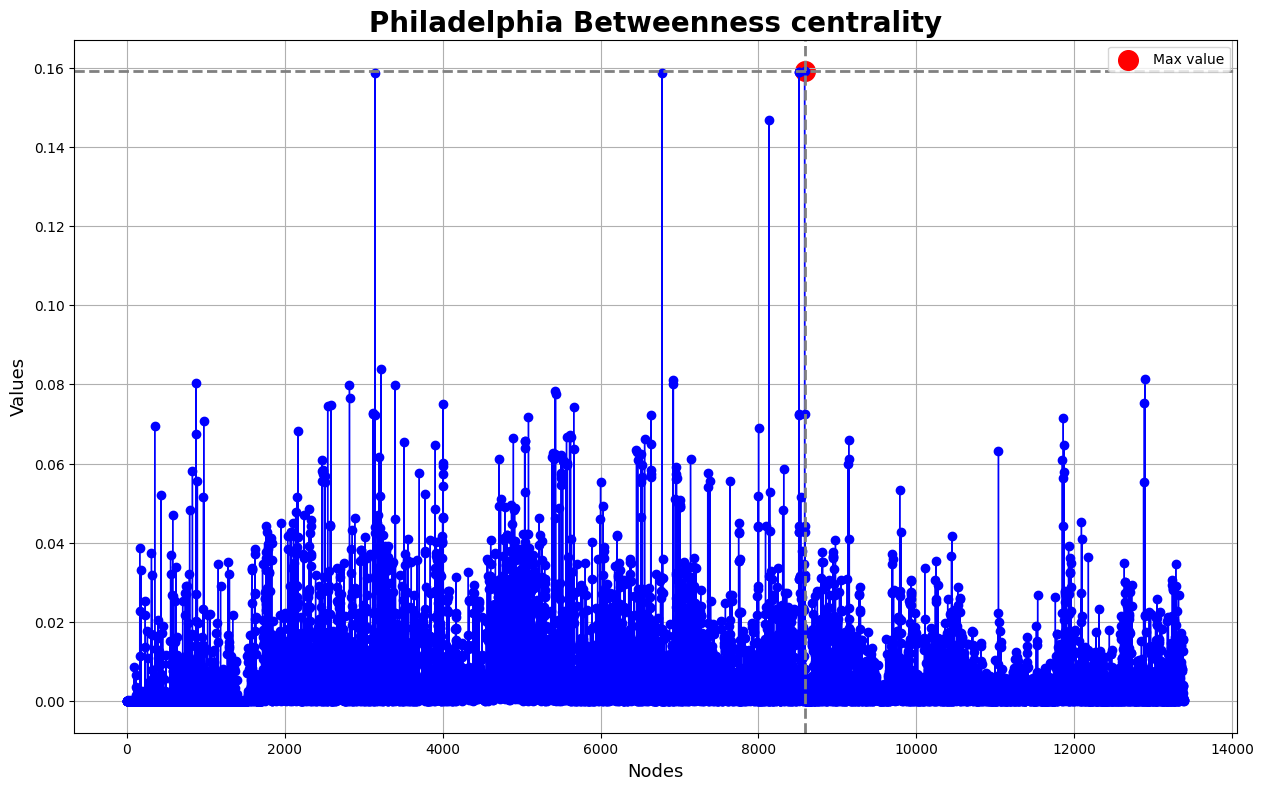

In [12]:
# Calculate Betweenness Centrality for Philadelphia
betweenness_centrality = nx.betweenness_centrality(G_phil_dir, weight='weight')
plot_data(betweenness_centrality, "Philadelphia Betweenness centrality")

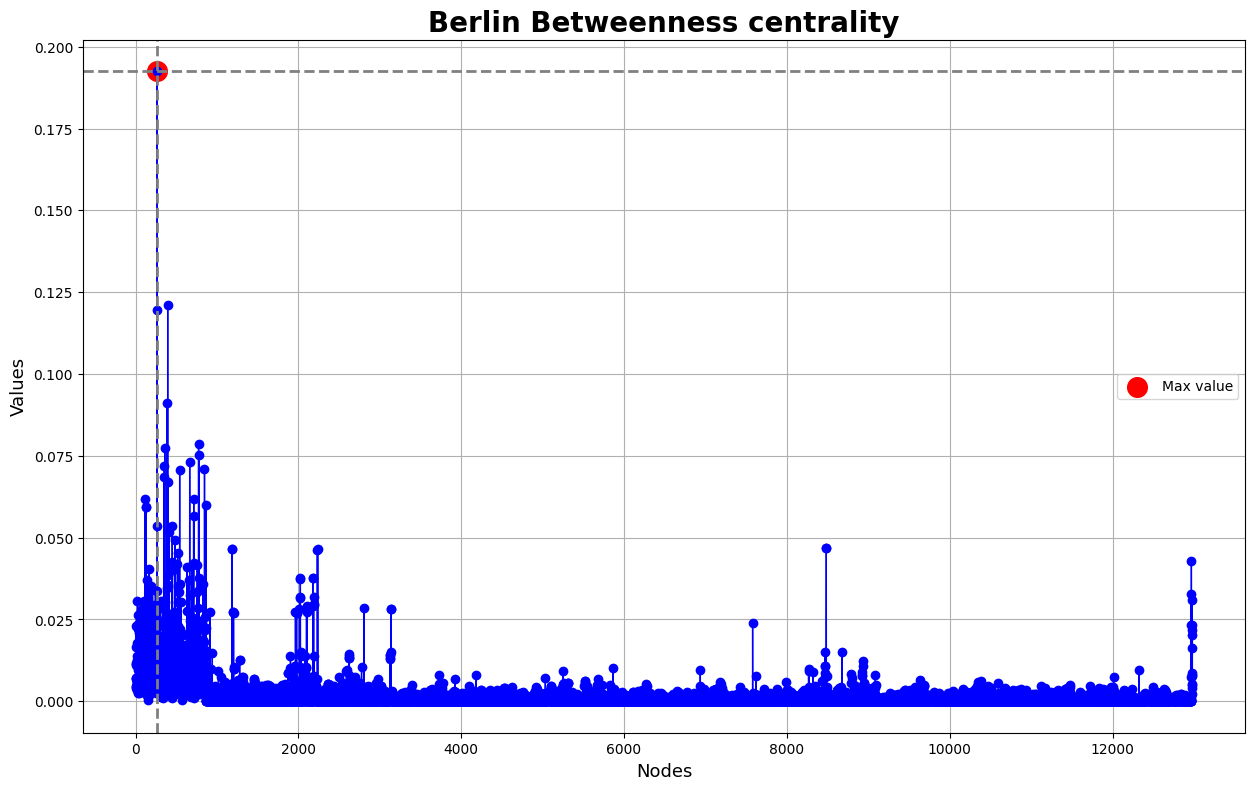

In [13]:
# Calculate Betweenness Centrality for Berlin
betweenness_centrality = nx.betweenness_centrality(G_berlin_dir, weight='weight')
plot_data(betweenness_centrality, "Berlin Betweenness centrality")

## Motifs occurrences analisys


In [14]:
from networkx.algorithms.isomorphism import GraphMatcher

def find_motif_occurrences(graph, motif):
    """
        Count the motifs for a given 'motif' in a given 'graph'

        Parameters:
        - graph: a nx.Graph() in which the motifs have to be counted
        - motif: a nx.Graph() that represents the motif to count

        Returns: 
        - the number of the occurrences
        - the dictionary storing the occurrences found with the labels of the node that form the 
    """
    motif_graph = nx.Graph(motif)
    gm = GraphMatcher(graph, motif_graph)

    occurrences = []

    for subgraph_nodes in gm.subgraph_isomorphisms_iter():
        occurrences.append({node: index for index, node in enumerate(subgraph_nodes)})

    occurrences = motifs_occurence_count(occurrences)
    
    return occurrences[0], occurrences[1]

In the following cells we aim to find the number of the occurrences of 3 different Motifs in both the graphs we are analyzing and then compare the results in order to have an idea on the topografic differences beetween these two cities by looking at the plotted results.


We decided to pick the motifs with an increasing number of nodes, in order to analyze different patterns.

The first motif has 3 nodes and has a triangular shape.

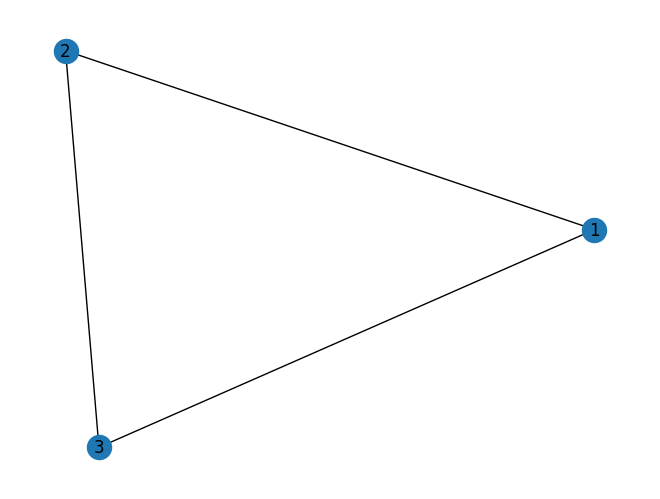

In [15]:
# Create a triangular motif (subgraph)
triangular_motif = nx.Graph()
triangular_motif.add_edges_from([(1, 2), (2, 3), (3, 1)])

plot_graph(triangular_motif)

In [16]:
# Find occurrences of the motif in the Philadelphia's graph
phil_len_occurrences_tr, phil_occurrences_tr = find_motif_occurrences(G_phil_und, triangular_motif)

# Print the occurrences
#print("Motif occurrences undirected:", phil_occurrences_tr)
print("Exact number of motifs Philadelphia: " , phil_len_occurrences_tr)

# Find occurrences of the motif in the Berlin's graph
berlin_len_occurrences_tr, berlin_occurrences_tr = find_motif_occurrences(G_berlin_und, triangular_motif)

# Print the occurrences
#print("\nMotif occurrences undirected:", berlin_occurrences_tr)
print("Exact number of motifs Berlin: " , berlin_len_occurrences_tr)

Exact number of motifs Philadelphia:  284
Exact number of motifs Berlin:  3994


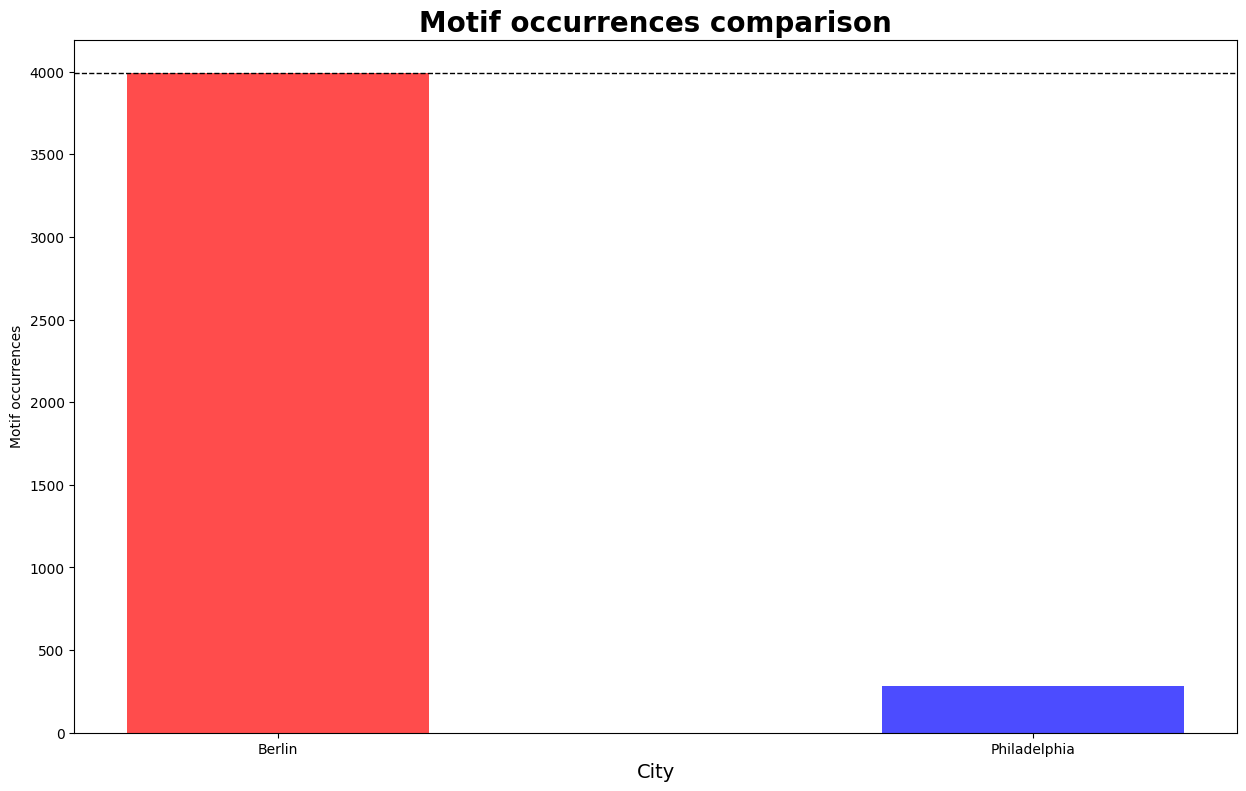

In [17]:
plot_hist(berlin_len_occurrences_tr, phil_len_occurrences_tr)

In the following, as the name suggests, the 'square_motif' has 4 nodes and its shape is a square.

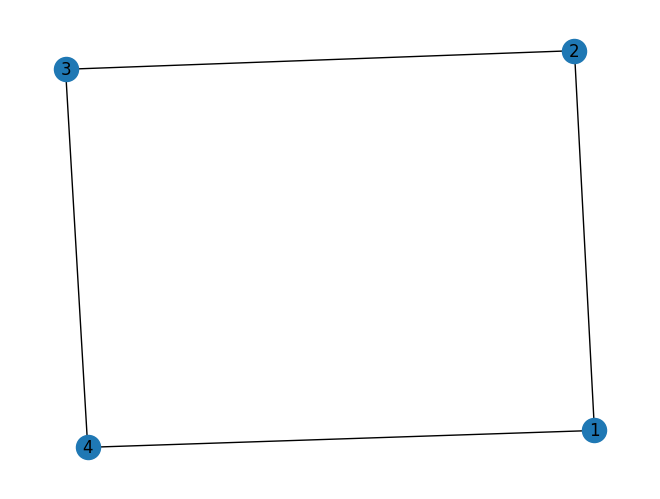

In [18]:
# Create a square motif (subgraph)
square_motif = nx.Graph()
square_motif.add_edges_from([(1, 2), (2, 3), (3, 4) , (4, 1)])
plot_graph(square_motif)

In [19]:
# Find occurrences of the motif in the Philadelphia's graph
phil_len_occurrences_sq, phil_occurrences_sq = find_motif_occurrences(G_phil_und, square_motif)

# Print the occurrences
#print("Motif occurrences undirected:", phil_occurrences_sq)
print("Exact number of motifs Philadelphia: " , phil_len_occurrences_sq)

# Find occurrences of the motif in the Berlin's graph
berlin_len_occurrences_sq, berlin_occurrences_sq = find_motif_occurrences(G_berlin_und, square_motif)

# Print the occurrences
#print("\nMotif occurrences undirected:", berlin_occurrences_sq)
print("Exact number of motifs Berlin: " , berlin_len_occurrences_sq)

Exact number of motifs Philadelphia:  2218
Exact number of motifs Berlin:  2470


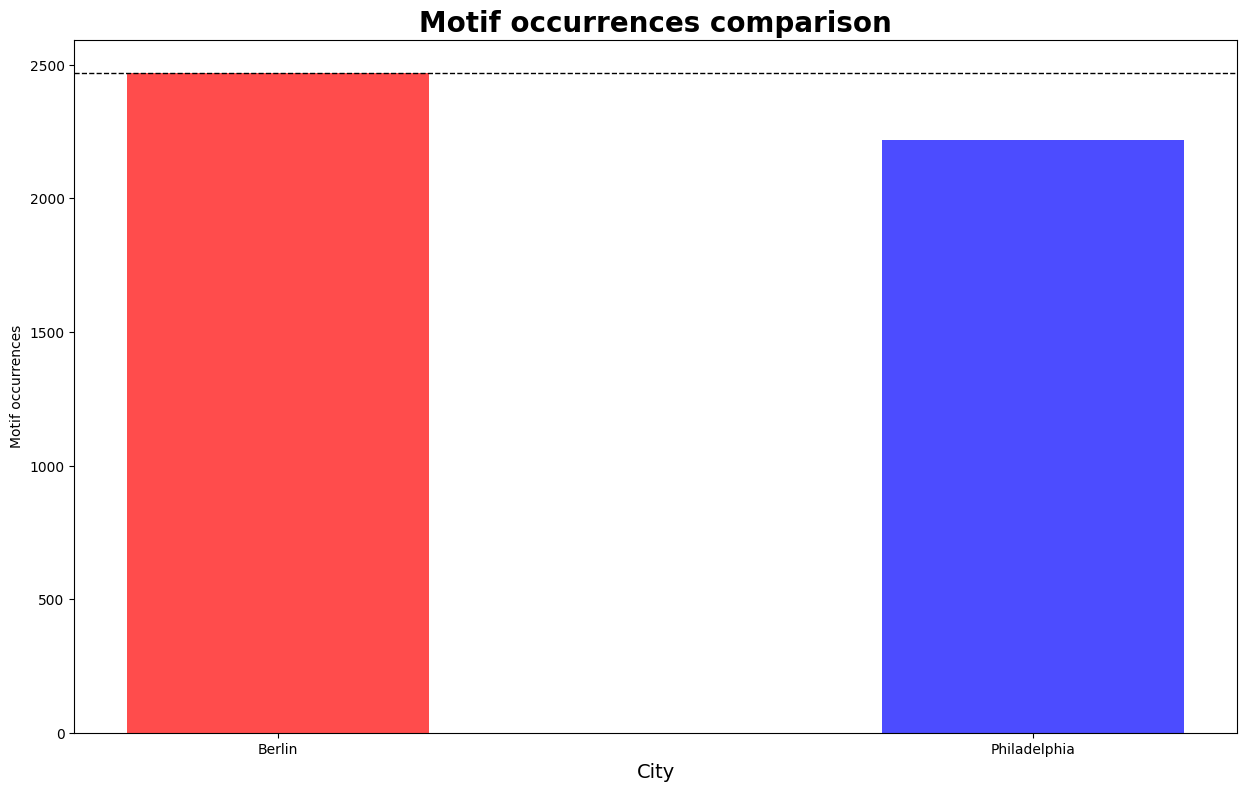

In [20]:
plot_hist(berlin_len_occurrences_sq, phil_len_occurrences_sq)

Lastly we decided to look for the occurrences of a 5 nodes motif: one node in the center connected to 4 other nodes

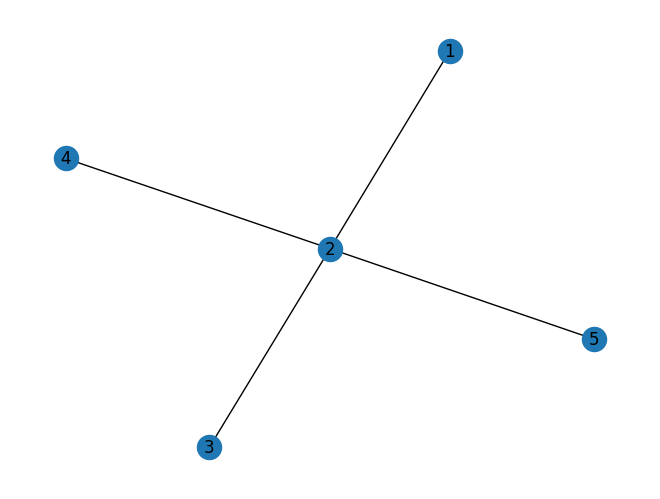

In [21]:
# Create a star motif (subgraph)
star_motif = nx.Graph()
star_motif.add_edges_from([(1, 2), (2, 3), (2, 4) , (2, 5)])
plot_graph(star_motif)

In [22]:
# Find occurrences of the motif in the Philadelphia's graph
phil_len_occurrences_st, phil_occurrences_st = find_motif_occurrences(G_phil_und, star_motif)

# Print the occurrences
#print("Motif occurrences undirected:", phil_occurrences_st)
print("Exact number of motifs Philadelphia: " , phil_len_occurrences_st)

# Find occurrences of the motif in the Berlin's graph
berlin_len_occurrences_st, berlin_occurrences_st = find_motif_occurrences(G_berlin_und, star_motif)

# Print the occurrences
#print("\nMotif occurrences undirected:", berlin_occurrences_st)
print("Exact number of motifs Berlin: " , berlin_len_occurrences_st)

Exact number of motifs Philadelphia:  3139
Exact number of motifs Berlin:  8233


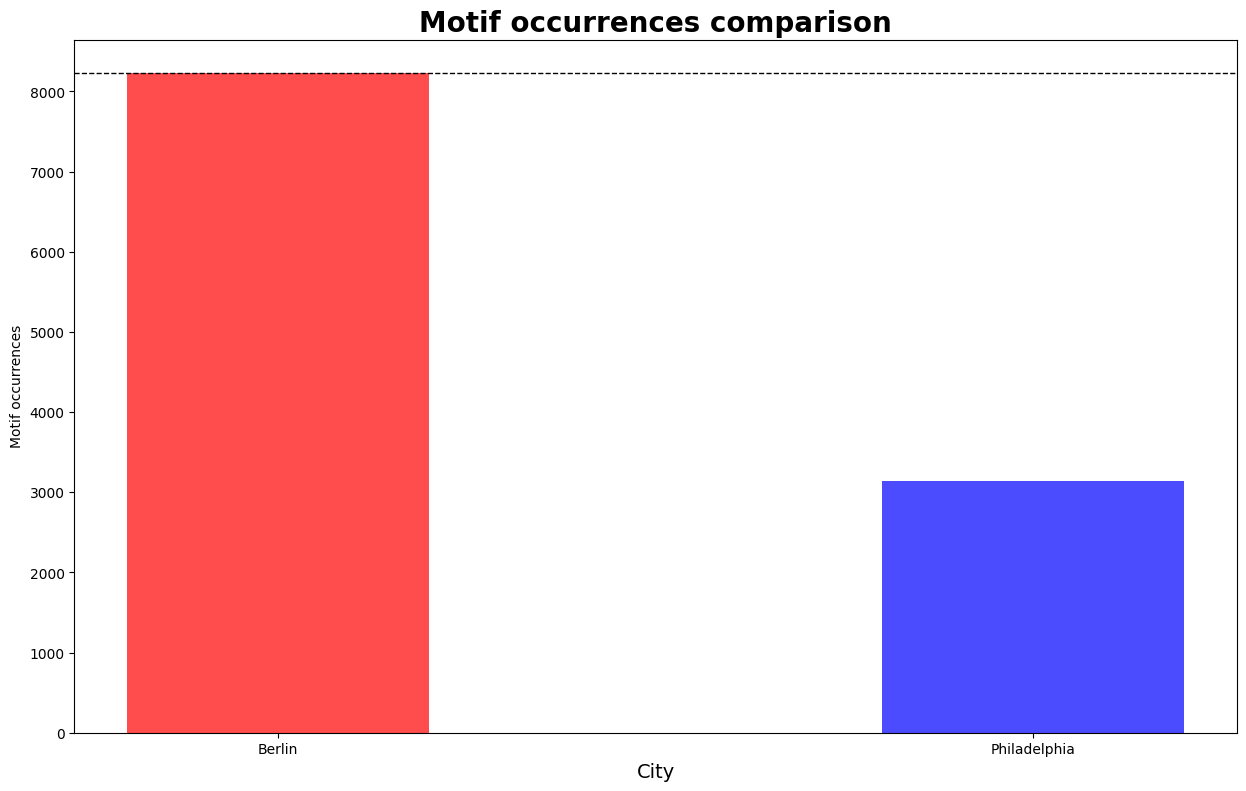

In [23]:
plot_hist(berlin_len_occurrences_st, phil_len_occurrences_st)

### MOTIFS DIRECTED GRAPH

We decided to analyze also the occurrences of a triangular directed motif so that we can exploit the differences of the road directions in our network

In [24]:
def remapping(G):
    """
        Standardize the nodes in the subgraph

        Parameters:
            - G: The input graph.

        Returns:
            - graph with renamed node
   
    """
    #define the name of the node
    node_count = 0
    node_mapping = {}
    for node in G:
            node_mapping[node] = node_count
            node_count += 1
    #rename the node
    G = nx.relabel_nodes(G, node_mapping)

    return G

def motifs_dictionary(dir_motifs , node_connection):
    """
        Update the dictionary of the motifs find into directed graph 

        Parameters:
            - dir_motifs: Dictionary containing the motifs found into the graph
            - node_connection: connection among the node into motifs found 

        Returns:
            - the updated dictionary
   
    """
    node_connection = tuple(node_connection)
    motifs_found = False
    #control in dictionary if the motifs is already insert
    for motifs in dir_motifs:
        if len(motifs) == len(node_connection):
            count = 0
            #control if the edge is a permutation of another key into the dictionary
            for i in range(len(motifs)):
                for j in range(len(motifs)):
                    if node_connection[i] == motifs[j]:
                        count += 1
            if count == len(motifs):
                dir_motifs.update({motifs:dir_motifs[motifs]+1})
                motifs_found = True
    if motifs_found == False:
        dir_motifs[node_connection] = 1

    return dir_motifs



def directed_motifs( G , n_motifs , motifs ):
    """
        Generate a dictionary with all motifs found into the directed graph 

        Parameters:
            - G: The input graph.
            - n_motifs: number of motifs found inside the undirected graph
            - motifs: node that form every motifs found in the undirected graph

        Returns:
            - dictionary with every type of motifs found into directed graph
   
    """
    #list of motifs found in undirected graph
    motifs = list(motifs)
    # dictionary of motifs found in directed graph
    dir_motifs = {}
    for i in range(n_motifs):
        #generate subgraph that contains the nodes in motifs
        subgraph = G.subgraph(motifs[i])
        #standardize the name of nodes into the subgraph
        subgraph = remapping(subgraph)
        node_connection = []
        for edge in subgraph.edges():
            node_connection.append((edge[0] , edge[1]))
        #update the dictionary of motifs
        motifs_count = motifs_dictionary(dir_motifs , node_connection)
    return motifs_count

In [25]:
def plot_hist_dir(data, title):
    """
        Plot a bar-graph where it's possible to compare the values of the occurrences of different directed motifs

        Parameters:
        - data: a dict where as a key there is the structure of the directed motif, as a value the number of the occurrences
        - title: the title for the graph
    """
    # Extracting keys and values
    motifs = [str(i) for i in range(len(data.keys()))]
    values = list(data.values())

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(motifs, values, color='skyblue')
    plt.xlabel('Road Directions', fontsize=14)
    plt.ylabel('Occurrences', fontsize=14)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xticks(ha='center')
    plt.tight_layout()

    # Display the plot
    plt.show()
    
def plot_road_direction(data, idx):
    """
        plot the selected road direction from 'data'. To select, give in input an index associated to the value in the 
        'Motif Occurrences' Graph

        Parameters:
        - data: a dict where as a key there is the structure of the directed motif, as a value the number of the occurrences
        - the index of the road direction to be plotted
    """
    # Convert dictionary keys to a list
    keys_list = list(data.keys())

    if idx < 0  or idx >= len(keys_list):
        print(f"Index out of range. Range: [0, {len(keys_list)-1}]")
        return
    
    key_at_index = keys_list[idx]

    directed_graph = nx.DiGraph(key_at_index)
    plot_graph(directed_graph)

In [26]:
#generation directed graph triangular motifs Philadelphia
motifs_triangular_phil = directed_motifs(G_phil_dir , phil_len_occurrences_tr , phil_occurrences_tr)

#generation directed graph triangular motifs Berlin
motifs_triangular_berlin = directed_motifs(G_berlin_dir , berlin_len_occurrences_tr , berlin_occurrences_tr)

In [27]:
#generation directed graph square motifs Philadelphia
motifs_square_phil = directed_motifs(G_phil_dir , phil_len_occurrences_sq , phil_occurrences_sq)

#generation directed graph square motifs Berlin
motifs_square_berlin = directed_motifs(G_berlin_dir , berlin_len_occurrences_sq , berlin_occurrences_sq)

In [28]:
#generation directed graph star motifs Philadelphia
motifs_star_phil = directed_motifs(G_phil_dir , phil_len_occurrences_st , phil_occurrences_st)

#generation directed graph star motifs Berlin
motifs_star_berlin = directed_motifs(G_berlin_dir , berlin_len_occurrences_st , berlin_occurrences_st)

# Plotting the results
In the next cells it's possible to plot the results obtained from the directed-motif analysis: the function 'plot_hist_dir' plots the occurrences of the all possible road direction for the analyzed motifs. On the x-axis there is the id-value associated for a specific directed graph, while on the y-axis lies the number of the occurrences associated with the latter.

With an increasing number of nodes for the analyzed motif there will be more permutations to count.

Using the ROAD_DIRECTION_IDX variable it's possible to plot the **most popular permutation of the motif**, with the use of the 'plot_road_direction' function: you just need to set its value to the index of the directed motif you want to analyze (**since we counted the occurrences of all the permutations of the directed motif**). For example we set it with the index of the motif with the most occurrences.

The index of the motif can be found on the plot right above (on the x-axis associated with the road direction)

### Triangular motif

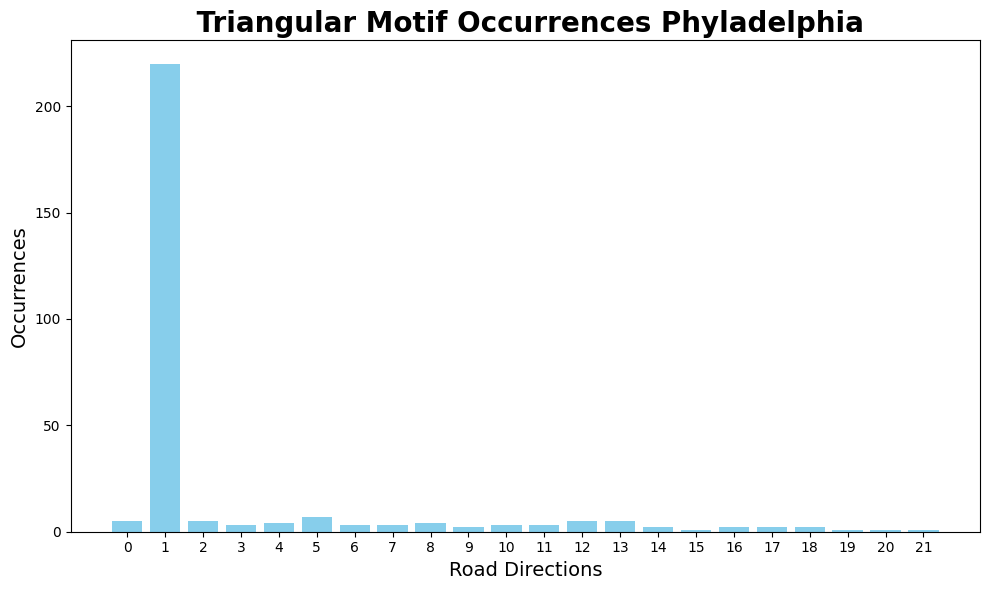

In [29]:
plot_hist_dir(motifs_triangular_phil, " Triangular Motif Occurrences Phyladelphia")

Using the ROAD_DIRECTION_IDX variable it's possible to plot the **most popular permutation of the motif**, with the use of the 'plot_road_direction' function: you just need to set its value to the index of the directed motif you want to analyze (**since we counted the occurrences of all the permutations of the directed motif**). For example we set it with the index of the motif with the most occurrences.

The index of the motif can be found on the plot right above (on the x-axis associated with the road direction)

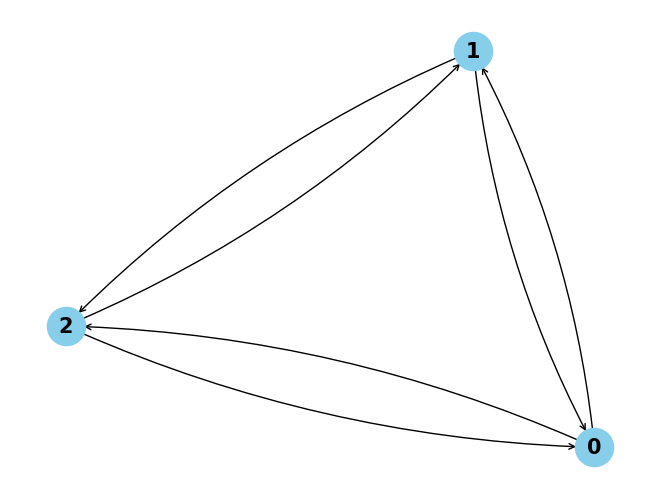

In [30]:
ROAD_DIRECTION_IDX = 1
plot_road_direction(motifs_triangular_phil, ROAD_DIRECTION_IDX)

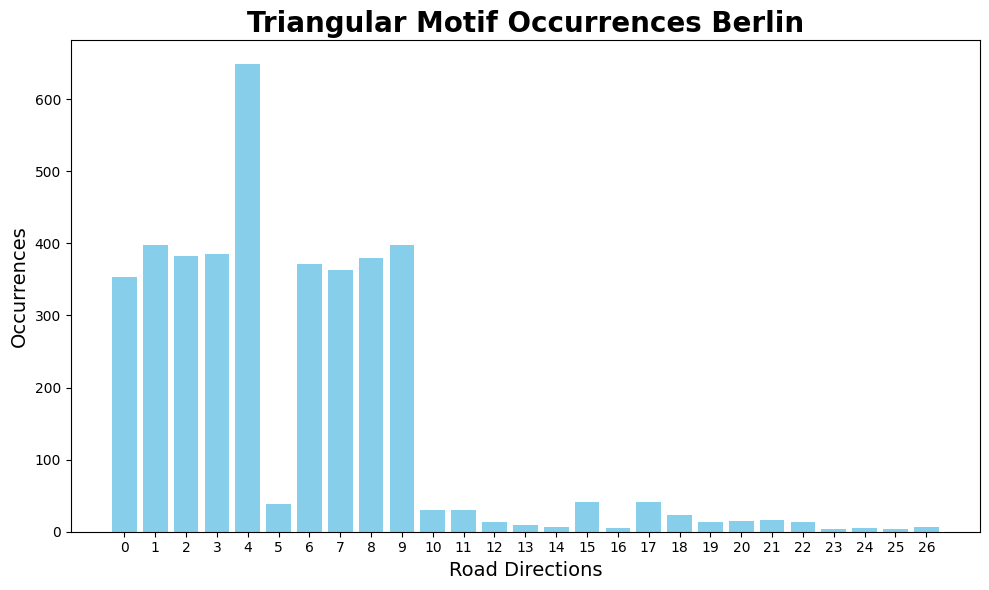

In [31]:
plot_hist_dir(motifs_triangular_berlin, "Triangular Motif Occurrences Berlin")

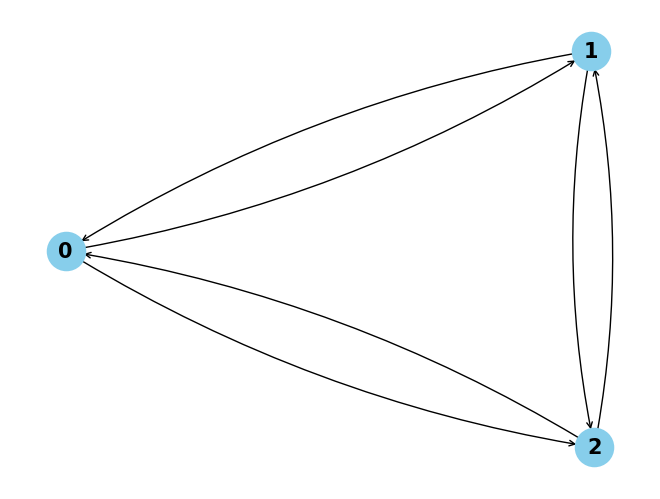

In [32]:
ROAD_DIRECTION_IDX = 4
plot_road_direction(motifs_triangular_berlin, ROAD_DIRECTION_IDX)

### Square motif

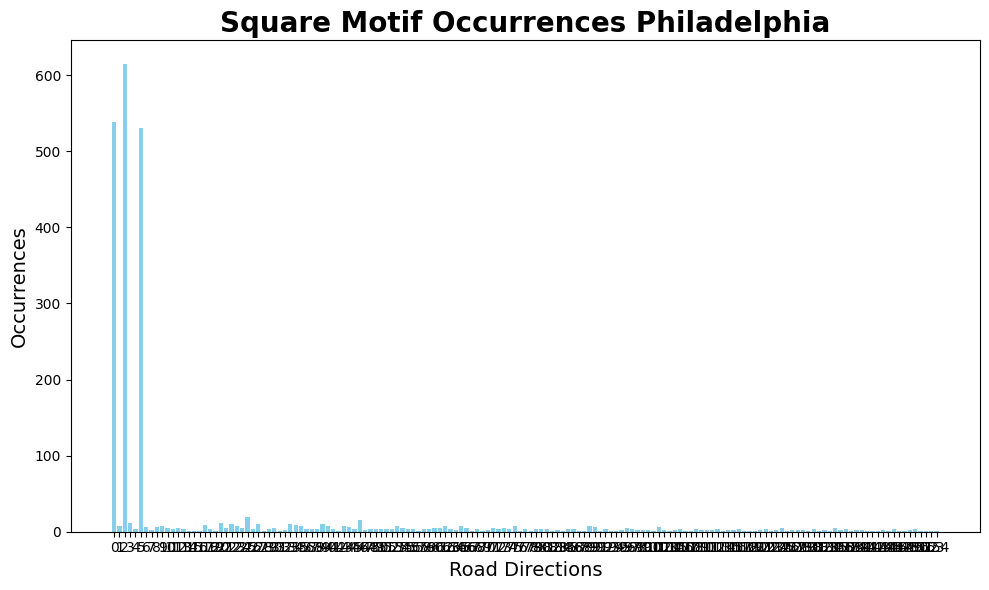

In [33]:
plot_hist_dir(motifs_square_phil, "Square Motif Occurrences Philadelphia")

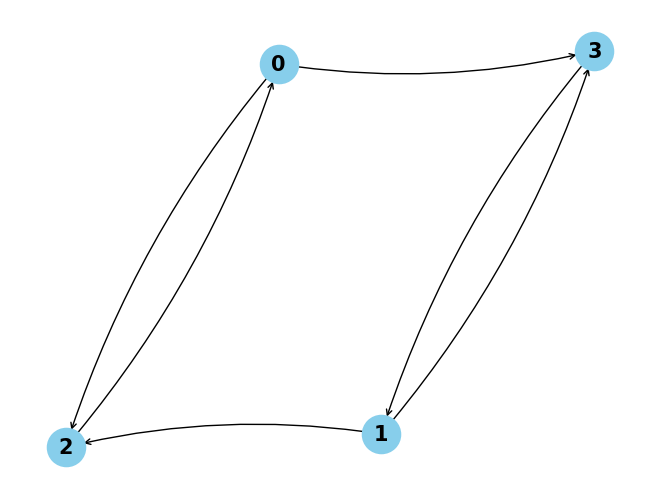

In [34]:
ROAD_DIRECTION_IDX = 4
plot_road_direction(motifs_square_phil, ROAD_DIRECTION_IDX)

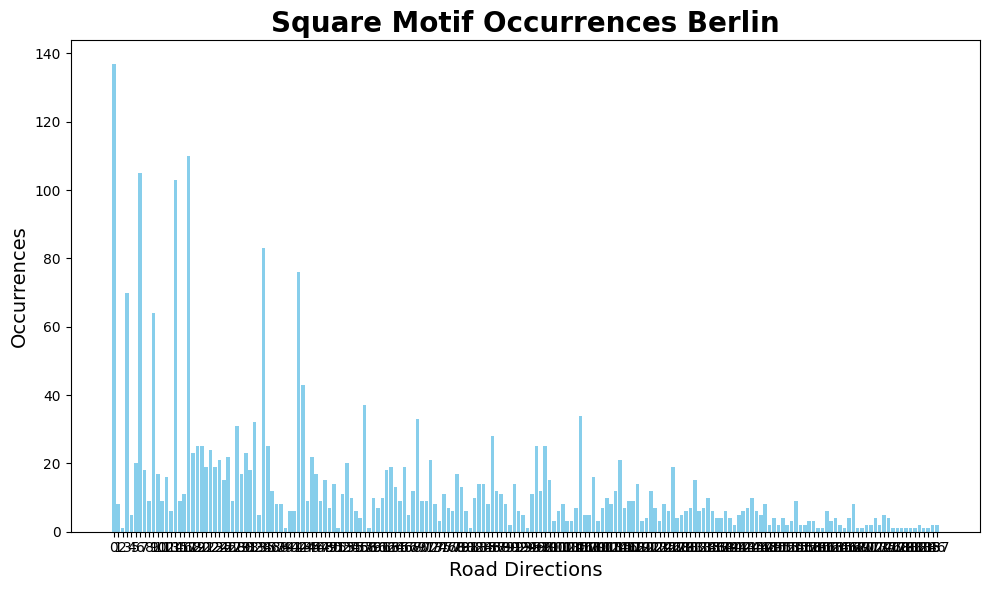

In [35]:
plot_hist_dir(motifs_square_berlin, "Square Motif Occurrences Berlin")

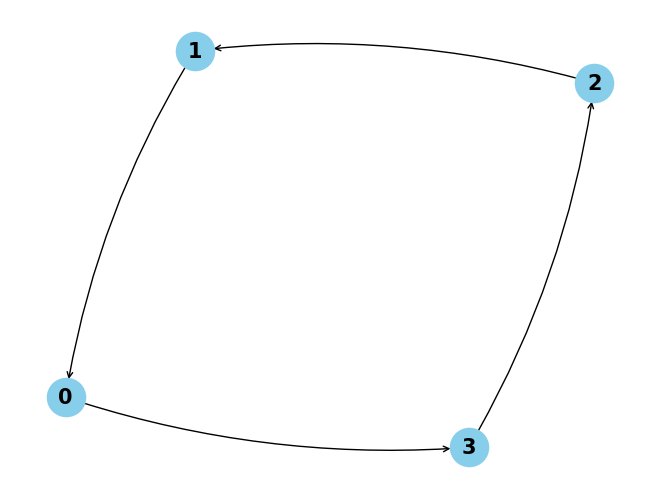

In [36]:
ROAD_DIRECTION_IDX = 0
plot_road_direction(motifs_square_berlin, ROAD_DIRECTION_IDX)

### Star motif

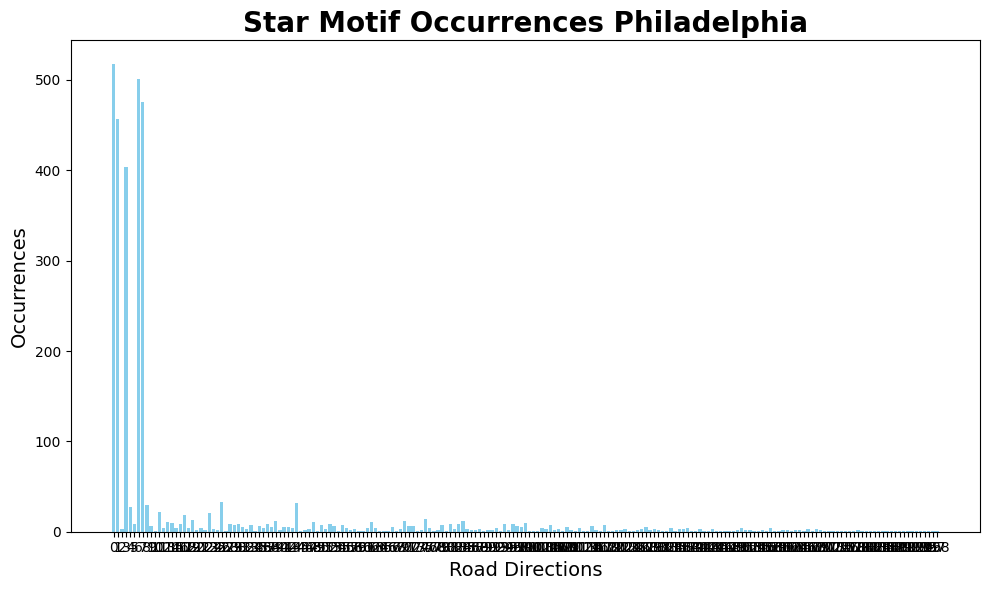

In [37]:
plot_hist_dir(motifs_star_phil, "Star Motif Occurrences Philadelphia")

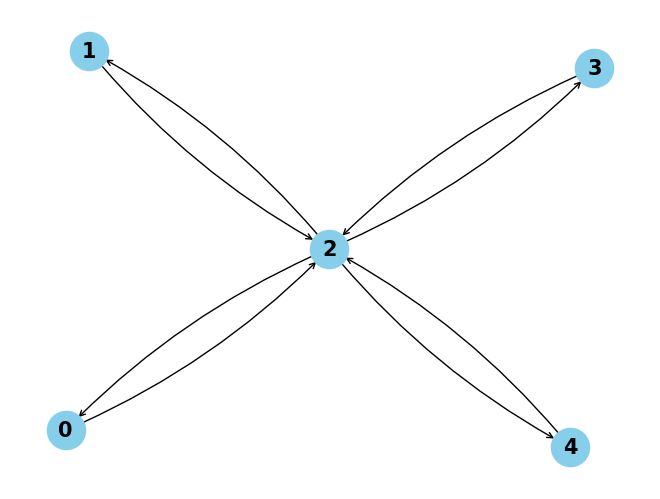

In [38]:
ROAD_DIRECTION_IDX = 0
plot_road_direction(motifs_star_phil, ROAD_DIRECTION_IDX)

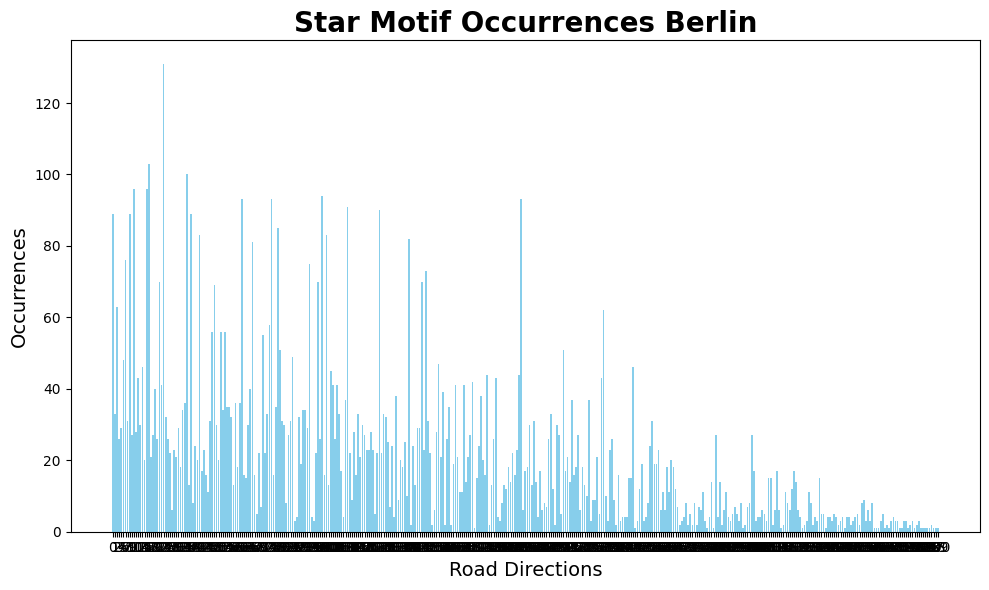

In [39]:
plot_hist_dir(motifs_star_berlin, "Star Motif Occurrences Berlin")

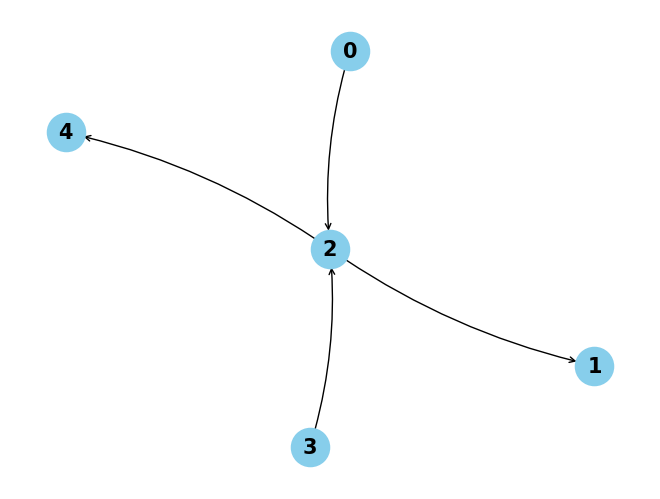

In [40]:
ROAD_DIRECTION_IDX = 24
plot_road_direction(motifs_star_berlin, ROAD_DIRECTION_IDX)